Construct a 2-component (d=2) GMM (Gaussian mixture model) with two outputs $(x_1,x_2)$ from available Python libraries e.g. scipy, numpy, etc. . Each component has the identity matrix $I$ as covariance matrix. The components have means $\mu_1=(1,1)$ and $\mu_2=(3,5)$. The mixing coefficients are 1/2. Plot samples (n=500) from this density.

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [20]:
# define the parameters for the two mixture components
mean_x1=(1,1)
cov_x1=np.identity(2)
x_1 = multivariate_normal(mean_x1, cov_x1)

mean_x2=(3,5)
cov_x2=np.identity(2)
x_2 = multivariate_normal(mean_x2, cov_x2)

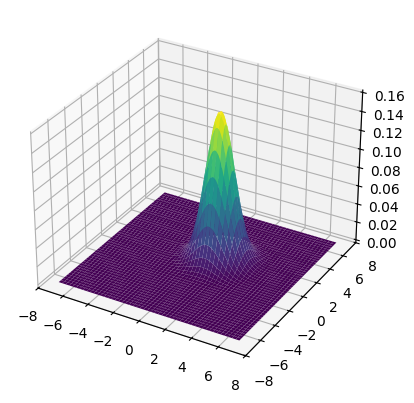

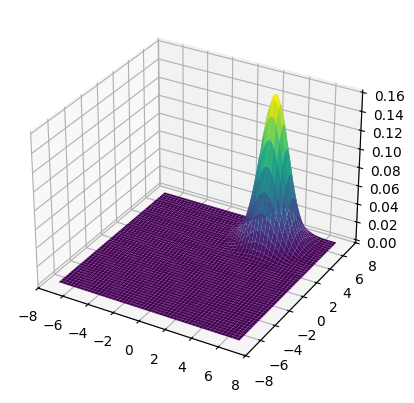

In [ ]:
#plot the densities for the two mixture components
range_1,range_2 = np.mgrid[-7:7:.01, -7:7:.01]
pos = np.dstack((range_1,range_2))

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(range_1,range_2, x_1.pdf(pos), cmap='viridis')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(range_1,range_2, x_2.pdf(pos), cmap='viridis')

[(-2.0, 6.0), (-2.0, 7.0)]

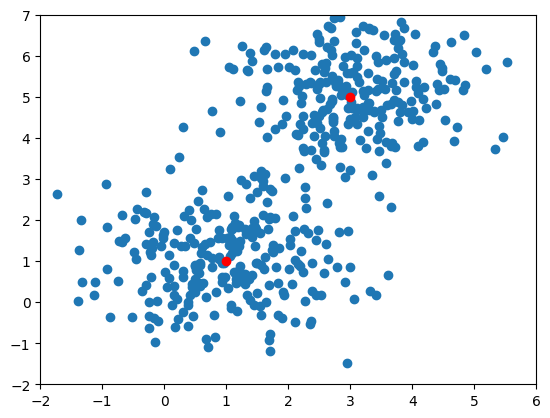

In [33]:
#generate 500 samples from the mixture model

#first sample from the categorical distribution: 1 or 2 with probability 0.5
cat_dist= np.random.choice([1,2],500,p=[0.5,0.5])
x=np.zeros((500,2))

#generate samples from mixture model
#if sample is 1, then sample from x_1, else from x_2
for i in range(500):
    if cat_dist[i]==1:
        x[i,:]=x_1.rvs(1)
    else:
        x[i,:]=x_2.rvs(1)


#plot the samples
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(x[:,0],x[:,1])
ax3.scatter(1,1,color='red')
ax3.scatter(3,5,color='red')
ax3.set(xlim=(-2, 6), ylim=(-2,7))


According to task 9.10 in Bishop, we know that the conditional of a mixture model is also a mixture model . Write a function that for a conditioning $x_1$ plots the density over $x_2$ . Plot the densities $p(x_2|x_1=2)$ and $p(x_2|x_1=3)$.

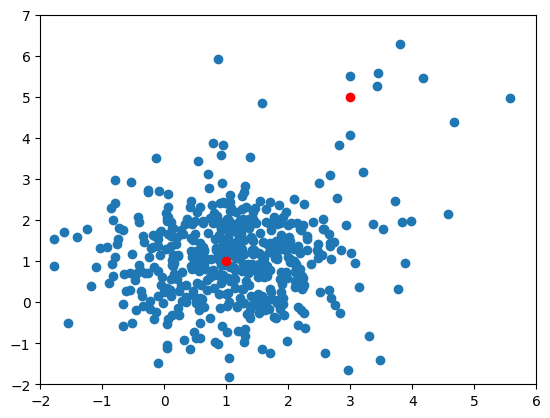

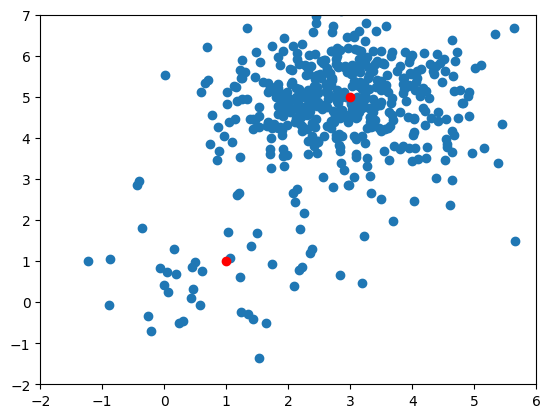

In [ ]:
#note that x_a and x_b are independent, thus p(x_b|k,x_a)=p(x_b|k)
x_b_1= x_1
x_b_2= x_2

def mix_sample(x_a):
    #mixing coefficient according to conditional mixture model
    pi_1=0.5 * x_1.pdf(x_a)/(0.5 * x_1.pdf(x_a) +0.5* x_2.pdf(x_a))
    pi_2=0.5 * x_2.pdf(x_a)/(0.5 * x_1.pdf(x_a) +0.5* x_2.pdf(x_a))

    #generate 500 samples from the mixture model

    #first sample from the categorical distribution: 1 or 2 with probability pi_1 or pi_2
    cat_dist= np.random.choice([1,2],500,p=[pi_1,pi_2])
    x_b_a=np.zeros((500,2))

    #generate samples from mixture model
    #if sample is 1, then sample from x_1, else from x_2
    for i in range(500):
        if cat_dist[i]==1:
            x_b_a[i,:]=x_b_1.rvs(1)
        else:
            x_b_a[i,:]=x_b_2.rvs(1)

    #plot the samples
    fig4 = plt.figure()
    ax4 = fig4.add_subplot(111)
    ax4.scatter(x_b_a[:,0],x_b_a[:,1])
    #true means of the mixture components
    ax4.scatter(1,1,color='red')
    ax4.scatter(3,5,color='red')
    ax4.set(xlim=(-2, 6), ylim=(-2,7))

    return x_b_a

x_b_a_2=mix_sample(2)
x_b_a_3=mix_sample(3)